# Tasks

* What is the mean (total) pledge that projects get? (not per backer) *Your answer may vary by +/- 5%

    * $2,245
    
    * $6,750
    
    * $10,981
    
    * $4,980

* Create a histogram that shows the distribution for number of backers.

* What is the skew of the distribution? 

* Is the ‘duration’ variable normally distributed? 
    * Yes
    * No

* If you could collect data on another attribute of these projects, what would it be and why? 


In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from tools.helpers import read_json
import pandas as pd
import numpy as np

In [4]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [5]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))

In [6]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

In [7]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

# Mean (total) pledge for projects

In [8]:
for i in df.columns:
    if is_number(df[i].dtype):
        if i == 'pledged':
            print('')
            print('\033[1m{} - mean: {} \033[0m'.format(i, df[i].mean()))
            print('')
        else:
            print('{} - mean {}:'.format(i, df[i].mean()))

project id - mean 1080799735.911439:
goal - mean 11942.709521509238:

pledged - mean: 4980.749678963979 

funded percentage - mean 1.8501285983504365:
backers - mean 69.97319233196248:
levels - mean 8.004939399873795:
updates - mean 4.085079530865809:
comments - mean 8.379528689862262:
duration - mean 39.9955469242988:


# Histogram of distribution for Number of Backers.

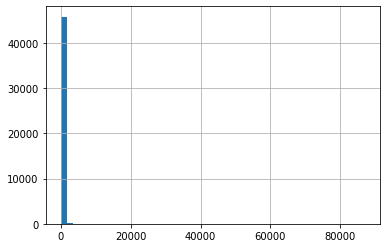

In [9]:
# df.backers.hist(bins='auto')
# https://datascience.stackexchange.com/questions/27116/histogram-plot-with-plt-hist

df.backers.hist(bins=50)

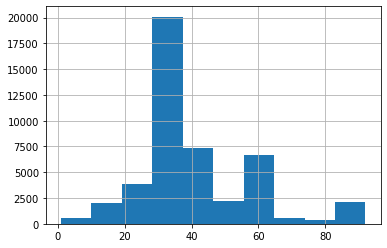

In [86]:
df['duration'].hist()

In [84]:


df['funded percentage'].describe()

count    45957.000000
mean         1.850129
std         88.492706
min          0.000000
25%          0.044000
50%          1.000000
75%          1.115640
max      15066.000000
Name: funded percentage, dtype: float64

In [10]:
df.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

In [25]:
df.backers.skew()

87.47397431084505

In [11]:
df.backers.sort_values()

29706        0
44903        0
28995        0
20904        0
5799         0
         ...  
17468    24883
11231    36276
42674    61290
10710    68929
41151    87142
Name: backers, Length: 45957, dtype: int64

# Skew of the distribution

In [12]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

# x = np.linspace( -5, 5, 1000 )
# y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution

# print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(y) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.backers) ))

# https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions

skewness of normal distribution (should be 0): 87.47111920387329


In [13]:
df['backers'].skew()

87.47397431084505

In [14]:
#kutosis
df['backers'].kurt()

9341.242538181974

In [15]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['backers'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

fit

array([0.00057635, 0.00057635, 0.00057635, ..., 0.        , 0.        ,
       0.        ])

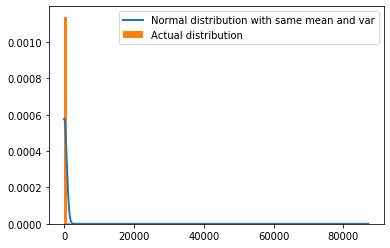

In [16]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['backers'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show() 

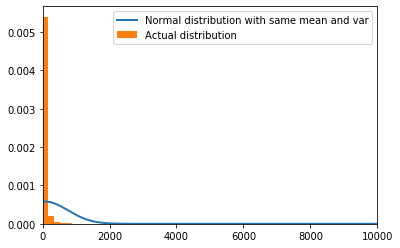

In [17]:


plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h, density=True, bins=500, label="Actual distribution")   
plt.xlim(0, 10000)     # set the xlim to left, right
plt.legend()
plt.show() 


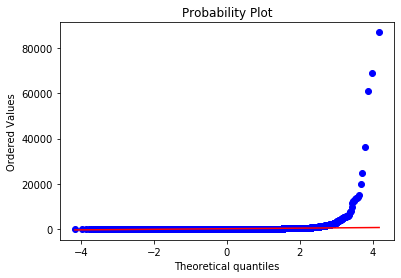

In [18]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.backers  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [19]:
import scipy

# scipy.stats.shapiro(dat)
# (0.9810476899147034, 1.3054057490080595e-05)scipy.stats.kstest(data, 'norm', args=(data_avg, data_sig))
# # https://stats.stackexchange.com/questions/299012/inconsistent-normality-tests-kolmogorov-smirnov-vs-shapiro-wilk

scipy.stats.shapiro(df.backers)

# stats.probplot(dat, dist=dist)

/Users/danielmsheehan/Documents/GitHub/general_assembly_data_analysis/venv/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.034664154052734375, 0.0)

In [20]:

# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

data = df.backers
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 14408.944
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [92]:
df

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00


In [21]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [23]:
import plotly.express as px
tips = px.data.tips()
fig = px.histogram(df, x="backers")

# import plotly.plotly as py
# px.plot(h, fit, '-', linewidth = 2, label="Normal distribution with same mean and var")

fig.show()

In [ ]:
df.columns

In [ ]:
df.location


In [93]:
import geocoder

g = geocoder.osm('Maplewood, NJ')


In [94]:
g

<[OK] Osm - Geocode [Maplewood, Essex County, New Jersey, 07040, USA]>

In [95]:
g.x

-74.2734808

In [98]:
df['geocode'] = df['location'].apply(geocoder.osm)

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Northampton%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Seattle%2C+WA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nomi

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Sayville%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chicago%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominat

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Amherst%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Minneapolis%2C+MN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nomina

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chicago%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Eagleville%2C+MO&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://no

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Philadelphia%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Wausau%2C+WI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Seattle%2C+WA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Diego%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nomi

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=London%2C+United+Kingdom&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Fort+White%2C+FL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Anchorage%2C+AK&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Seattle%2C+WA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: ht

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Grand+Rapids%2C+MI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Rocky+Point%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https:

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Houston%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Nashville%2C+TN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Buffalo%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominat

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Pittsburgh%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Champaign%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+Haven%2C+CT&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://no

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Raleigh%2C+NC&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Salt+Lake+City%2C+UT&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https:

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Portsmouth%2C+VA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Philadelphia%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Long+Beach%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: h

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Houston%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/s

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Craig%2C+CO&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Helsinki%2C+Finland&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Austin%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nom

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Stehekin%2C+WA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Modesto%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Tempe%2C+AZ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Cambridge%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominati

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Phoenix%2C+AZ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Knoxville%2C+TN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.open

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Winter+Haven%2C+FL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Somerville%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https:/

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Hollywood%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Detroit%2C+MI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Putney%2C+VT&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstree

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Henderson%2C+KY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Oak+Park%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Colorado+Springs%2C+CO&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Columbus%2C+OH&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Hill+City%2C+SD&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Manhattan%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chicago%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://no

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Edmonton%2C+Canada&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Grand+Rapids%2C+MI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: h

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Charleston%2C+SC&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Ayden%2C+NC&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Worcester%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nom

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Philadelphia%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Thurmont%2C+MD&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Minneapolis%2C+MN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://n

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Miami%2C+FL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Minden%2C+NV&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Mesa%2C+AZ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Pleasant+Hill%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Detroit%2C+MI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Cambridge%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Cambridge%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Jersey+City%2C+NJ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://no

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Austin%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Jerusalem%2C+Israel&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Alturas%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Huntington%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Dallas%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Belfast%2C+United+Kingdom&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: http

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Nashville%2C+TN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Menasha%2C+WI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Diego%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Richmond%2C+VA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Detroit%2C+MI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://n

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Portland%2C+ME&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Pacific+Grove%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https:

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Portland%2C+OR&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Harrisburg%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Bloomfield%2C+NJ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.ope

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chapel+Hill%2C+NC&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Dallas%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.ope

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Erie%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Norwich%2C+CT&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominati

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Detroit%2C+MI&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=East+Stroudsburg%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chicago%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Kent%2C+OH&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chicago%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Nashville%2C+TN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominat

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Atlanta%2C+GA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Seattle%2C+WA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Reno%2C+NV&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.op

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Fitchburg%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Georgetown%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Seattle%2C+WA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://n

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boulder%2C+CO&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Diego%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https:

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Carbondale%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Harrisburg%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.ope

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Greeley%2C+CO&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Philadelphia%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+Orleans%2C+LA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Tallahassee%2C+FL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Diego%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Mendham%2C+NJ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Boston%2C+MA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Jacksonville%2C+FL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Washington%2C+DC&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Savannah%2C+GA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=San+Francisco%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Marshall%2C+NC&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chicago%2C+IL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://no

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=nan&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Brooklyn%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Las+Vegas%2C+NV&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Orlando%2C+FL&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstr

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Moshi%2C+Tanzania&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Nashville%2C+TN&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Denton%2C+TX&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Toronto%2C+Canada&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://n

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Chambersburg%2C+PA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Duisburg%2C+Germany&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+Brunswick%2C+NJ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for ur

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Newberg%2C+OR&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=New+York%2C+NY&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+CA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Kansas+City%2C+MO&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://n

KeyboardInterrupt: 

In [115]:
dfg = df.groupby('location', as_index=False).count()

dfg.sort_values('updates', ascending=False,)


,location,project id,name,url,category,subcategory,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
2459,"Los Angeles, CA",3927,3927,3927,3927,3927,3927,3927,3925,3927,3927,3927,3927,3925,3927,3927,3927
3000,"New York, NY",3647,3647,3647,3647,3647,3647,3647,3647,3647,3647,3647,3647,3634,3647,3647,3647
529,"Brooklyn, NY",1613,1613,1613,1613,1613,1613,1613,1612,1613,1613,1613,1613,1613,1613,1613,1613
804,"Chicago, IL",1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1492,1496,1496,1496
3794,"San Francisco, CA",1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,"Johnstown, CO",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2088,"Jonesborough, TN",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2090,"Jos, Nigeria",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2092,"JuchitÛÎn De Zaragoza, Mexico",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [116]:
dfg['geocode'] = dfg['location'].apply(geocoder.osm)

Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=1%2C+LA&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=10%2C+Middleburg%2C+MD&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Aasiaat%2C+Greenland&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://nominatim.openstreetmap.org/search?q=Absecon%2C+NJ&format=jsonv2&addressdetails=1&limit=1
Status code 429 from https://nominatim.openstreetmap.org/search: ERROR - 429 Client Error: Too Many Requests for url: https://

KeyboardInterrupt: 

In [ ]:
df['longitude'] = [d.get('x') for d in df['geocode']]
df['latitude'] = [d.get('y') for d in df['geocode']]

In [ ]:
out_csv = 'data/processing/DSI_kickstarterscrape_dataset.csv'

df.to_csv(out_csv, index=False)